In [ ]:
import sys 
import os
from collections import defaultdict

sys.path.append(os.path.abspath("/scratch/xl01339/Enhancing_Sketch-to-3D_Controllability"))

import h5py
import numpy as np
import torch
from tqdm.notebook import trange

from src.utils.spaghetti_util import generate_zc_from_sj_gaus, load_spaghetti, load_marching_cube_meshing, get_mesh_from_spaghetti
from src.utils.visual_util import render_gaussians, render_mesh
from src.utils.image_util import merge_images
from configs.log_config import logger
from configs.global_setting import DATA_DIR, BASE_DIR, device

# Load dataset

In [ ]:
# data_path = DATA_DIR / '03001627_10_latents/spaghetti_chair_latents_10_samples_mean_std.hdf5'
# data_path = BASE_DIR / 'output/03001627_10/1a6f615e8b1b5ae4dbbc9440457e303e.hdf5'
data_path = DATA_DIR / 'salad_data/spaghetti_chair_latents.hdf5'
data_keys = ['s_j_affine', 'g_js_affine']

data = defaultdict()
with h5py.File(data_path, 'r') as f:
    for key in data_keys:
        if key in f:
            data[key] = f[key][:].astype(np.float32)
            logger.info(f"Data for {key}:")
            logger.info(data[key])
        else:
            logger.warning(f"Key {key} not found in the file.")

extrinsics = data['g_js_affine']
intrinsics = data['s_j_affine']
# extrinsics = torch.tensor([extrinsics])
# intrinsics = torch.tensor([intrinsics])

2025-06-30 14:38:52,843 - INFO - Data for s_j_affine:
2025-06-30 14:38:52,844 - INFO - [[[ 1.4709992  -1.2150325   0.0659076  ...  0.04333181 -0.8009543
    0.562546  ]
  [ 1.9845777  -1.0756621  -0.08027886 ... -0.5629442   0.38898858
    1.0392374 ]
  [ 0.13809916 -0.9461365   0.26986536 ...  0.12913992  0.63650316
    0.2754985 ]
  ...
  [ 2.1938648  -0.1476124  -0.21261793 ... -0.21232294  0.14313896
    0.37468776]
  [ 1.6156726  -0.16868463  0.0495151  ... -0.03416809  0.06036619
    0.8597583 ]
  [ 2.1529753  -0.00850368 -0.07759042 ... -0.02397633  0.26750037
    0.5746001 ]]

 [[ 1.5202882  -0.58302987  0.18754402 ... -0.05047406 -0.6314327
    0.6770954 ]
  [ 3.176971   -1.1158547  -0.01281402 ... -0.73616827 -0.10298599
    0.35994193]
  [ 0.07348317  0.19198513  0.20705001 ...  0.34394482  0.18176466
    0.57654303]
  ...
  [ 2.6900058  -0.11053342 -0.227377   ... -0.23375182  0.13121489
    0.93963635]
  [ 0.9829466  -0.36787271  0.23402931 ... -0.02090975  0.16900234
    

# Load SPAGHETTI and Mesher

In [ ]:
data_name = 'chairs_large'
spaghetti = load_spaghetti(device=device, tag=data_name)
zcs = generate_zc_from_sj_gaus(spaghetti, intrinsics, extrinsics)

mc_mesher = load_marching_cube_meshing(device=device)

2025-06-30 14:38:55,254 - INFO - ******************************
2025-06-30 14:38:55,255 - INFO - loading spaghetti model from /scratch/xl01339/Enhancing_Sketch-to-3D_Controllability/assets/checkpoints/spaghetti_chairs_large/model
2025-06-30 14:38:55,255 - INFO - ******************************


# Visualize dataset

  0%|          | 0/10 [00:00<?, ?it/s]

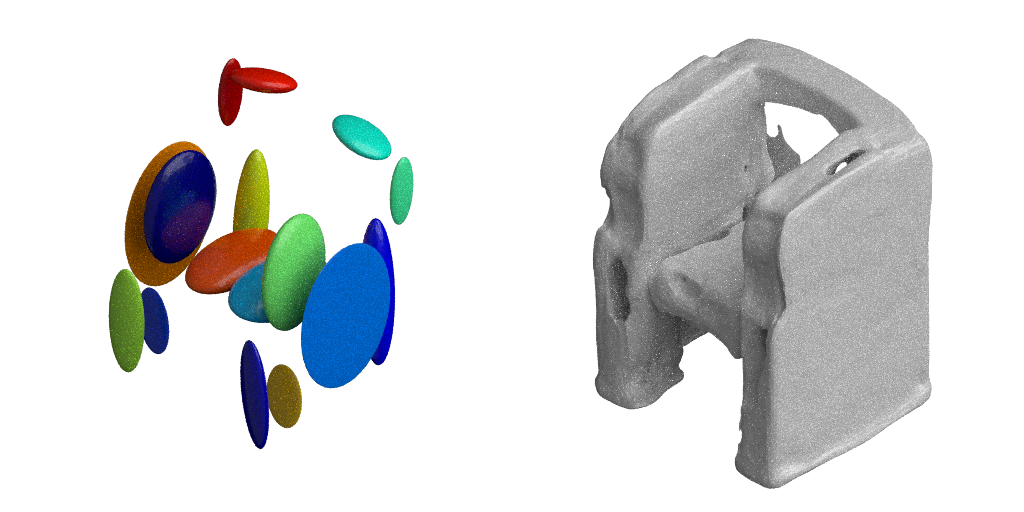

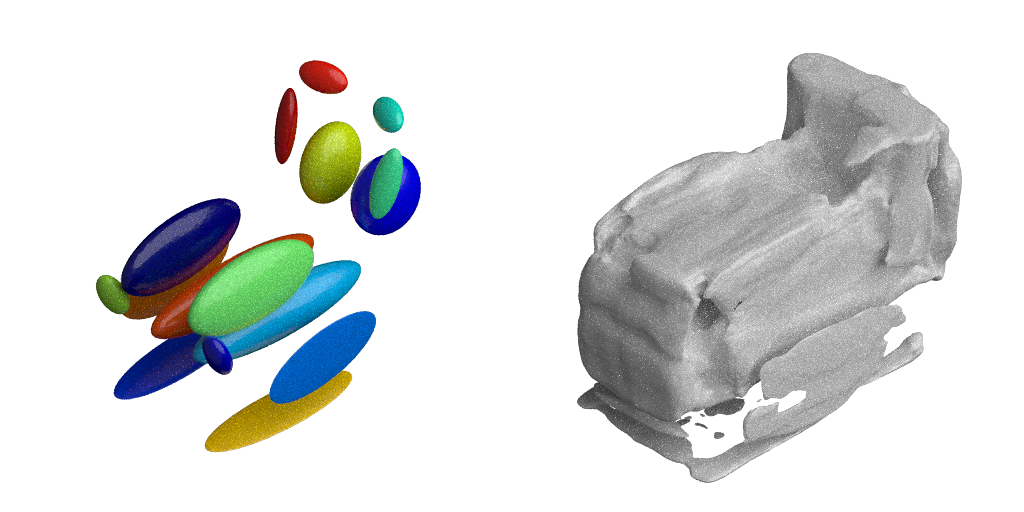

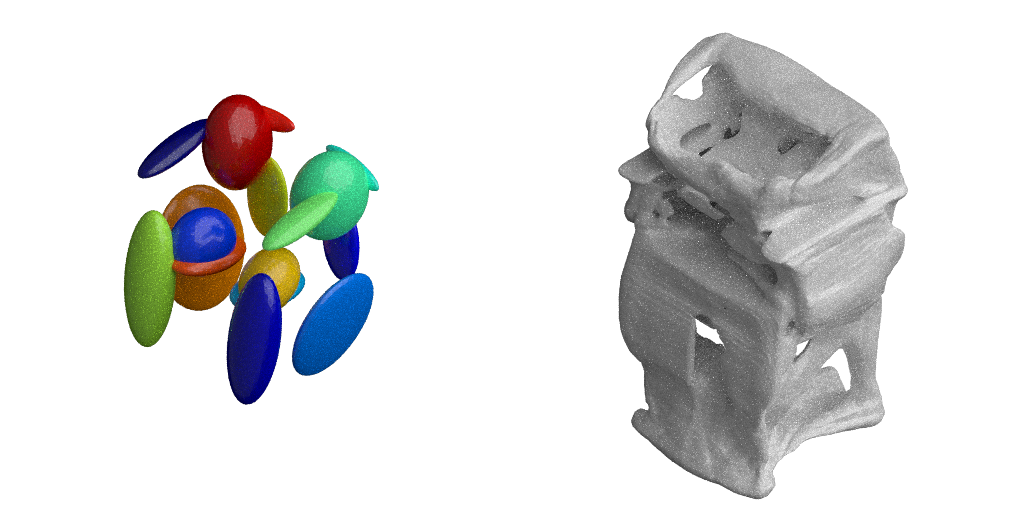

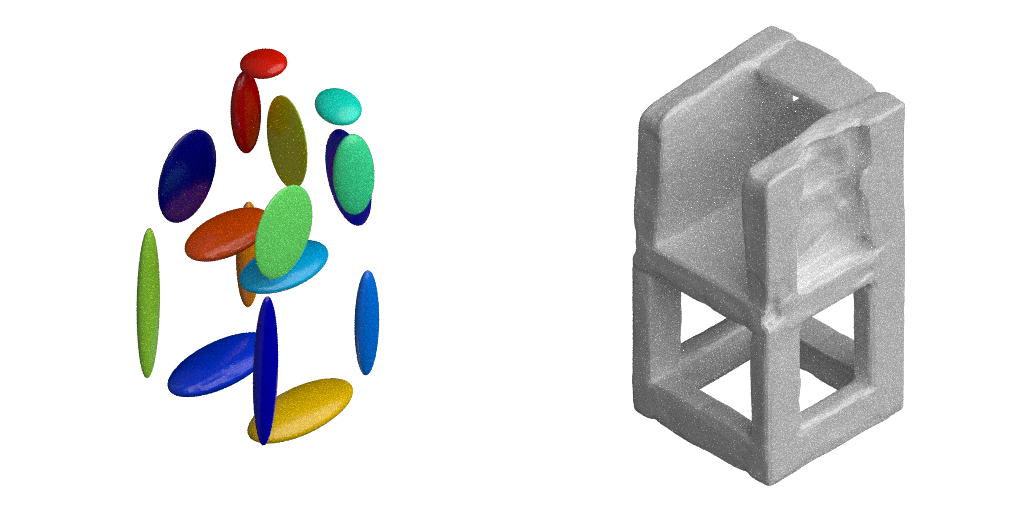

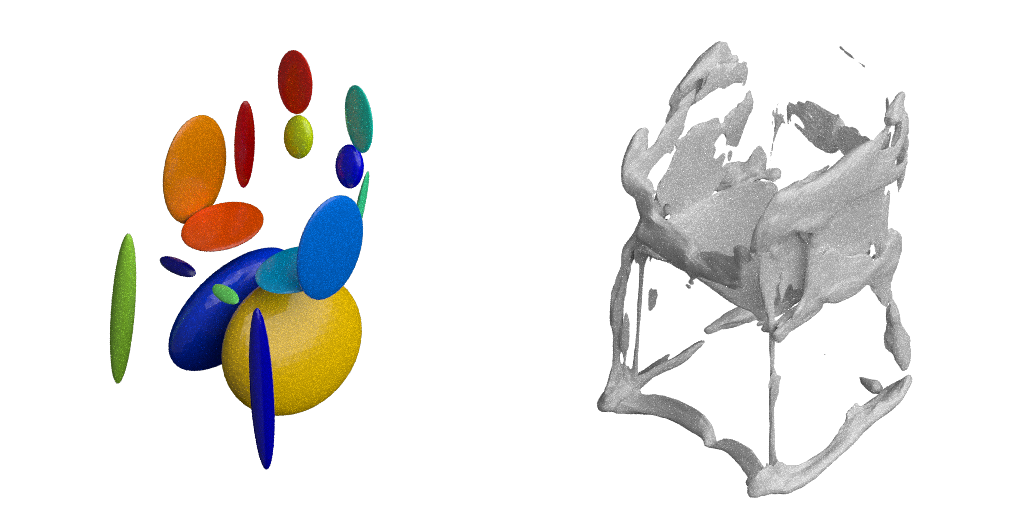

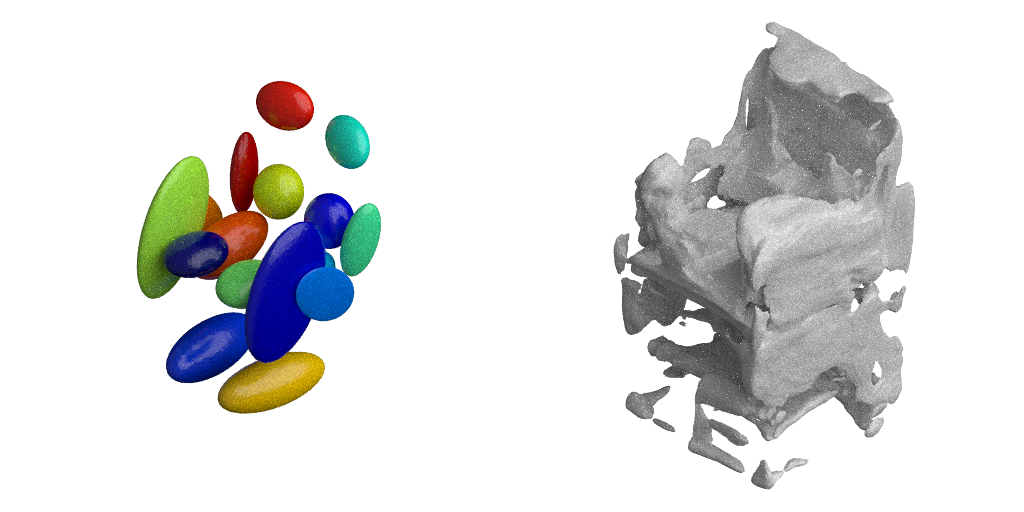

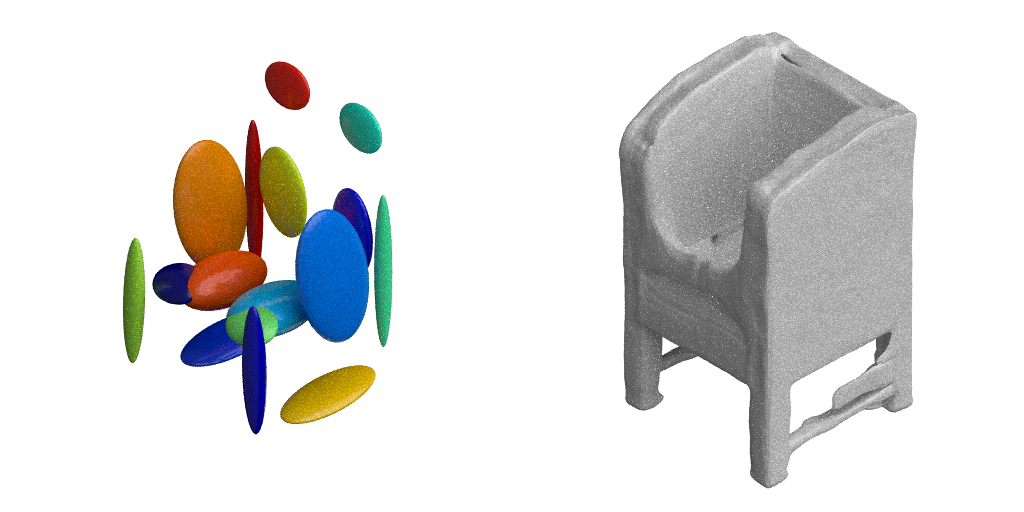

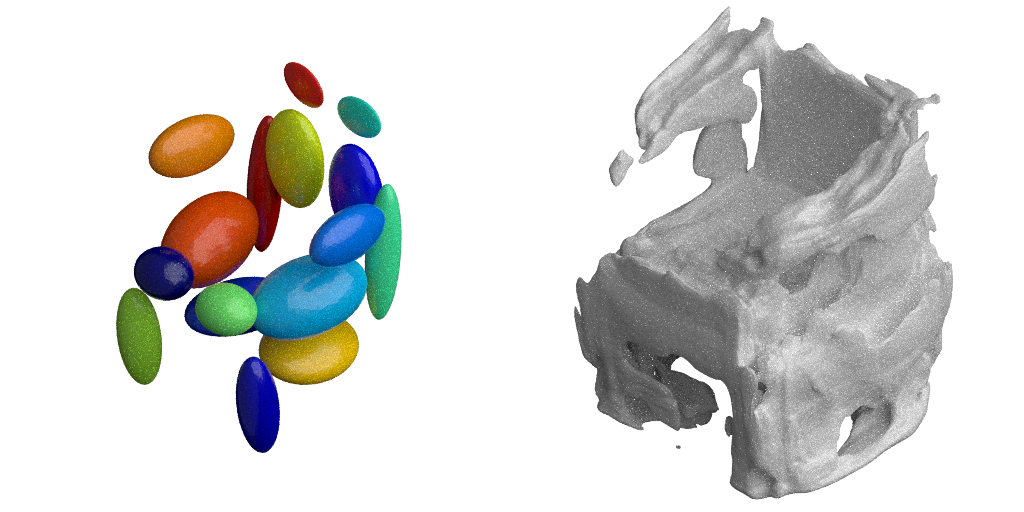

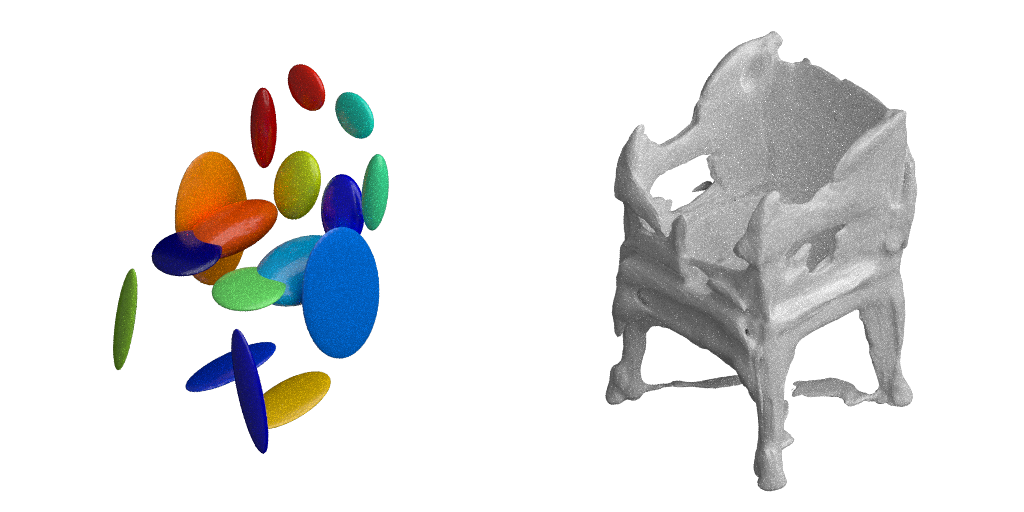

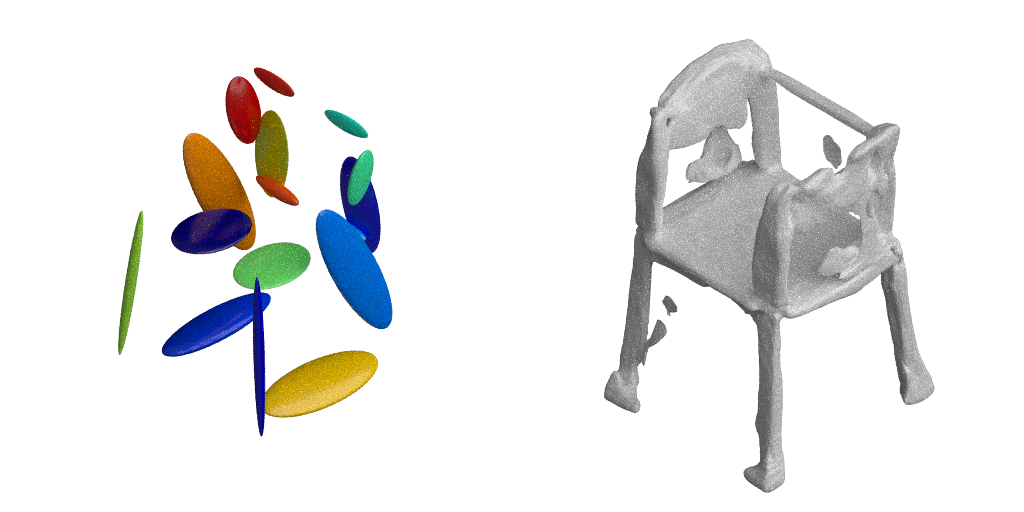

In [ ]:
# visualize
save_dir = BASE_DIR / f'output/dataset_visual_images/{data_name}_v1/'
if not os.path.exists(save_dir):
    os.makedirs(save_dir)
for i in trange(len(zcs)):
    if i == 3517:
      gaus_img = render_gaussians(extrinsics[i])

      v, f = get_mesh_from_spaghetti(spaghetti, mc_mesher, zcs[i], res=256)
      mesh_img = render_mesh(v, f)

      save_path = save_dir / f'render_mesh_{i}.png'
      img = merge_images([gaus_img, mesh_img], save_path)
      display(img)